In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [2]:
# load preprocessed data
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/data_all_reset.csv'

# Read the CSV file into a DataFrame
data_all_reset = pd.read_csv(file_path)
data_all_reset

,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Date,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image File,Image Height,Image Width,Image X,Image Y,Intensity,Length,Original Reference ID,Particles Per Chain,Perimeter,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,Class,path
0,1,225.6288,242.5331,0.7807,103.6006,108.9748,111.5660,0.7075,1,1,478,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,2023-07-07,16.9493,20.1441,17.5728,61.5870,1.688,1.8052,45.0,-45.0,0.0749,0.9304,0.0,0.5540,24.7150,13.6911,NELU-C2-10x_000001.tif,37,34,0,0,107.6777,22.9938,4C7B7810-460E-4A30-A499-EAD2BF8B789B,1,76.8122,0.9507,1.0769,1.0238,1.1323,0.0,0.0,0.0,22.8898,32,0.0,0,0.0,0.0,68483.0,0.6080,10:46:13,2023-07-07T10:46:13.597,0.1586,2549.5040,4279.983,17.3338,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
1,2,58.4998,58.8657,0.6323,103.9087,115.0776,118.6621,0.7075,1,1,861,541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,2023-07-07,8.6304,12.5188,8.6574,60.0400,1.688,6.6170,-85.0,0.0,0.7746,0.5635,0.0,0.1511,26.9941,4.0795,NELU-C2-10x_000001.tif,29,23,36,0,112.1370,15.2112,CB5DBFBA-91B3-49D0-9F3F-40D0F3135833,1,62.1472,0.9029,1.1420,1.0311,1.4123,0.0,0.0,0.0,9.8916,32,0.0,0,0.0,0.0,24558.0,0.4728,10:46:13,2023-07-07T10:46:13.597,0.3106,336.5858,1027.280,10.2588,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
2,3,173.9068,176.7952,0.4683,113.4023,124.5566,127.6934,0.7075,1,1,221,1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,2023-07-07,14.8804,19.6135,15.0034,51.7025,1.735,7.7141,-70.0,20.0,0.7824,0.5610,0.0,0.1296,44.7665,5.8032,NELU-C2-10x_000001.tif,40,34,61,0,121.5781,25.1163,8777DAD3-5004-4A14-866F-1C43EE9BD1A2,1,101.1395,0.9104,1.1260,1.0252,1.5240,0.0,0.0,0.0,17.2754,33,0.0,0,0.0,0.0,62248.0,0.5822,10:46:13,2023-07-07T10:46:13.649,0.2413,1725.1970,3950.591,11.6738,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
3,4,90.9054,90.9054,0.2330,79.6361,87.9016,91.2787,0.7075,1,1,654,509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,2023-07-07,10.7585,17.3534,10.7585,159.7470,1.735,4.9412,15.0,-75.0,0.0636,0.9402,0.0,0.2024,27.4659,5.5585,NELU-C2-10x_000001.tif,20,43,97,0,85.8197,25.8238,458E8477-C0C7-4C20-8E2C-586257868DC1,1,66.0489,0.9060,1.1462,1.0384,1.1178,0.0,0.0,0.0,21.0279,33,0.0,0,0.0,0.0,26175.0,0.6954,10:46:13,2023-07-07T10:46:13.649,0.3800,652.0009,2736.230,4.5987,NELU,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
4,5,27.1872,27.1872,0.5611,132.4884,137.3721,138.3876,0.7075,1,1,599,1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,2023-07-07,5.8835,11.4183,5.8835,21.5500,1.782,16.6380,-10.0,-80.0,1.1548,0.4641,0.0,0.0601,32.7772,1.9700,NELU-C2-10x_000001.tif,21,30,142,0,136.0155,15.2112,75A12674-70A3-4CF8-A84C-7118003B215F,2,69.4945,0.9644,1.0445,1.0074,1.7170,0.0,0.0,0.0,4.8224,34,0.0,0,0.0,0.0,17546.0,0.5765,10:46:13,2023-07-07T10:46:13.700,0.4847,106.6374,779.469,7.4287,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,6770,45.9070,48.0345

## Remove unnessecary columns
Explanation of parameters see FlowCam Documentation.

In [3]:
columns_to_drop = ['Particle ID','Average Blue', 'Average Green', 'Average Red','Calibration Factor','Calibration Image','Camera', 'Capture X', 'Capture Y', 'Ch1 Area', 'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width', 'Ch2/Ch1 Ratio', 'Date', 'Ratio Blue/Green','Ratio Red/Blue', 'Ratio Red/Green','Date','Elapsed Time', 'Filter Score', 'Image File', 'Original Reference ID', 'Scatter Area', 'Scatter Peak', 'Scatter Width', 'Source Image', 'Sphere Complement', 'Sphere Count', 'Sphere Unknown', 'Sphere Volume','Time', 'Timestamp', 'path']
data_wrong= data_all_reset.drop(columns=columns_to_drop)

In [4]:
print(data_wrong[data_wrong.Class == 'ANCR'].shape[0])
print(data_wrong[data_wrong.Class == 'NELU'].shape[0])
print(data_wrong[data_wrong.Class == 'TRSP'].shape[0])
print(data_wrong[data_wrong.Class == 'ANLO'].shape[0])
print(data_wrong[data_wrong.Class == 'TEMA'].shape[0])
print(data_wrong[data_wrong.Class == 'LUCU'].shape[0])

1612
1918
1503
997
1835
3679


In [5]:
data_wrong.Class.unique()
data_wrong

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
0,225.6288,242.5331,0.7807,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,16.9493,20.1441,17.5728,61.5870,1.8052,45.0,-45.0,0.0749,0.9304,0.5540,24.7150,13.6911,37,34,0,0,107.6777,22.9938,1,76.8122,1.1323,22.8898,68483.0,0.6080,0.1586,2549.5040,4279.983,17.3338,WRONG
1,58.4998,58.8657,0.6323,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,8.6304,12.5188,8.6574,60.0400,6.6170,-85.0,0.0,0.7746,0.5635,0.1511,26.9941,4.0795,29,23,36,0,112.1370,15.2112,1,62.1472,1.4123,9.8916,24558.0,0.4728,0.3106,336.5858,1027.280,10.2588,WRONG
2,173.9068,176.7952,0.4683,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,14.8804,19.6135,15.0034,51.7025,7.7141,-70.0,20.0,0.7824,0.5610,0.1296,44.7665,5.8032,40,34,61,0,121.5781,25.1163,1,101.1395,1.5240,17.2754,62248.0,0.5822,0.2413,1725.1970,3950.591,11.6738,WRONG
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
4,27.1872,27.1872,0.5611,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,5.8835,11.4183,5.8835,21.5500,16.6380,-10.0,-80.0,1.1548,0.4641,0.0601,32.7772,1.9700,21,30,142,0,136.0155,15.2112,2,69.4945,1.7170,4.8224,17546.0,0.5765,0.4847,106.6374,779.469,7.4287,WRONG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,45.9070,48.0345,0.3670,0.2740,0.0939,0.3485,10.6525,51.2507,0.6013,7.6453,14.8968,7.8204,88.2188,31.4339,30.0,-45.0,1.5338,0.3947,0.0318,54.6767,1.7394,29,32,874,237,132.8913,21.5787,1,112.8322,2.2016,41.5695,24452.0,0.2571,0.4868,234.0000,1730.000,6.7213,WRONG
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU
166516,119.5490,150.5521,0.7210,0.4475,0.1002,0.3019,9.9814,90.5558,0.3790,12.3375,27.3370,13.8452,97.1787,29.3233,55.0,10.0,1.4840,0.4026,0.0341,81.7220,2.7869,48,42,1013,237,114.9074,32.8987,1,169.0178,1.8664,33.6843,43435.0,0.5084,0.5487,983.0000,10700.000,22.9938,LUCU


In [6]:
# drop all samples with label WRONG and Debris
data = data_wrong.drop(data_wrong[data_wrong.Class == 'WRONG'].index, inplace=False)
data = data.drop(data[data.Class == 'DEBRIS'].index, inplace=False)
data

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166508,82.0731,95.1653,0.2817,0.1195,0.1569,0.2487,6.3741,80.2568,0.4573,10.2225,24.0943,11.0076,80.2180,17.9692,-80.0,5.0,0.5537,0.6436,0.0557,53.3131,2.9669,55,26,641,237,122.0426,34.3137,1,112.5601,1.4025,39.0471,34416.0,0.3658,0.5757,559.0000,7320.000,10.9663,LUCU
166512,112.0144,133.1521,0.5078,0.1658,0.0612,0.1536,16.3310,113.9731,0.2586,11.9424,34.8050,13.0205,85.3724,49.2850,-45.0,70.0,1.4358,0.4105,0.0203,100.8167,2.0456,53,65,807,237,123.0056,41.3888,1,205.7245,1.8050,32.7749,44159.0,0.4158,0.6569,892.0000,22100.000,24.4088,LUCU
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU


In [7]:
print(data[data.Class == 'ANCR'].shape[0])
print(data[data.Class == 'NELU'].shape[0])
print(data[data.Class == 'TRSP'].shape[0])
print(data[data.Class == 'ANLO'].shape[0])
print(data[data.Class == 'TEMA'].shape[0])
print(data[data.Class == 'LUCU'].shape[0])
print(data[data.Class == 'DEBRIS'].shape[0])

1612
1918
1503
997
1835
3679
0


In [8]:
data.Class.unique()

array(['NELU', 'ANCR', 'TRSP', 'ANLO', 'TEMA', 'LUCU'], dtype=object)

In [9]:
data.head()

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11544 entries, 3 to 166516
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area (ABD)             11544 non-null  float64
 1   Area (Filled)          11544 non-null  float64
 2   Aspect Ratio           11544 non-null  float64
 3   Circle Fit             11544 non-null  float64
 4   Circularity            11544 non-null  float64
 5   Circularity (Hu)       11544 non-null  float64
 6   Compactness            11544 non-null  float64
 7   Convex Perimeter       11544 non-null  float64
 8   Convexity              11544 non-null  float64
 9   Diameter (ABD)         11544 non-null  float64
 10  Diameter (ESD)         11544 non-null  float64
 11  Diameter (FD)          11544 non-null  float64
 12  Edge Gradient          11544 non-null  float64
 13  Elongation             11544 non-null  float64
 14  Feret Angle Max        11544 non-null  float64
 15  Feret 

## Drop missing data

In [11]:
data.isnull().sum()

Area (ABD)               0
Area (Filled)            0
Aspect Ratio             0
Circle Fit               0
Circularity              0
Circularity (Hu)         0
Compactness              0
Convex Perimeter         0
Convexity                0
Diameter (ABD)           0
Diameter (ESD)           0
Diameter (FD)            0
Edge Gradient            0
Elongation               0
Feret Angle Max          0
Feret Angle Min          0
Fiber Curl               0
Fiber Straightness       0
Geodesic Aspect Ratio    0
Geodesic Length          0
Geodesic Thickness       0
Image Height             0
Image Width              0
Image X                  0
Image Y                  0
Intensity                0
Length                   0
Particles Per Chain      0
Perimeter                0
Roughness                0
Sigma Intensity          0
Sum Intensity            0
Symmetry                 0
Transparency             0
Volume (ABD)             0
Volume (ESD)             0
Width                    0
C

#### -> no missing values

## Handle categorical data

In [12]:
print(data.dtypes)

Area (ABD)               float64
Area (Filled)            float64
Aspect Ratio             float64
Circle Fit               float64
Circularity              float64
Circularity (Hu)         float64
Compactness              float64
Convex Perimeter         float64
Convexity                float64
Diameter (ABD)           float64
Diameter (ESD)           float64
Diameter (FD)            float64
Edge Gradient            float64
Elongation               float64
Feret Angle Max          float64
Feret Angle Min          float64
Fiber Curl               float64
Fiber Straightness       float64
Geodesic Aspect Ratio    float64
Geodesic Length          float64
Geodesic Thickness       float64
Image Height               int64
Image Width                int64
Image X                    int64
Image Y                    int64
Intensity                float64
Length                   float64
Particles Per Chain        int64
Perimeter                float64
Roughness                float64
Sigma Inte

#### no categorical data apart from class label

# Train-Test split 

In [13]:
from sklearn import datasets
X = data.drop(columns=["Class"])

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])
class_names = label_encoder.classes_.astype(str)

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [16]:
from collections import defaultdict

label_to_class = {i: class_name for i, class_name in enumerate(class_names)}

train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

for encoded_label in y_train:
    class_name = label_to_class[encoded_label]
    train_class_counts[class_name] += 1

for encoded_label in y_test:
    class_name = label_to_class[encoded_label]
    test_class_counts[class_name] += 1

print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print('\nNumber of samples in test set:')
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
NELU: 1343
ANLO: 698
LUCU: 2575
TEMA: 1284
TRSP: 1052
ANCR: 1128

Number of samples in test set:
NELU: 575
LUCU: 1104
ANLO: 299
ANCR: 484
TEMA: 551
TRSP: 451


# Create, train and visualize the decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#create the tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)

#fit the tree with training set
tree.fit(X_train, y_train)

#cross-validation
cross_val_score(tree, X_train, y_train, cv=7)


array([0.97489177, 0.96190476, 0.96707106, 0.97053726, 0.96967071,
       0.96187175, 0.97140381])

In [18]:
type(X_test)
X_test_orig = X_test

In [19]:
#test with test data
print(metrics.accuracy_score(y_test, tree.predict(X_test)))
print(metrics.classification_report(y_test, tree.predict(X_test)))

0.9725750577367206
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       484
           1       0.97      0.97      0.97       299
           2       1.00      0.99      0.99      1104
           3       0.98      0.99      0.99       575
           4       0.99      0.98      0.98       551
           5       0.94      0.94      0.94       451

    accuracy                           0.97      3464
   macro avg       0.97      0.97      0.97      3464
weighted avg       0.97      0.97      0.97      3464



## Optimization on test sets

### Load selected features

In [20]:
import pickle
# Load the saved feature indices
with open('features/features_IMbalanced_NO_DEBRIS.pkl', 'rb') as f:
    selected_features = pickle.load(f)

In [21]:
# drop columns that have low feature importances from training and validation sets
X_train_drop = X_train[selected_features]
X_test_drop = X_test[selected_features]

# train new tree with cut training set
cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
cut_clf.fit(X_train_drop, y_train)

# validate with test set
print(metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

0.9763279445727483


In [22]:
print(metrics.classification_report(y_train, cut_clf.predict(X_train_drop)))
print(metrics.classification_report(y_test, cut_clf.predict(X_test_drop)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00       698
           2       1.00      1.00      1.00      2575
           3       1.00      1.00      1.00      1343
           4       1.00      1.00      1.00      1284
           5       1.00      1.00      1.00      1052

    accuracy                           1.00      8080
   macro avg       1.00      1.00      1.00      8080
weighted avg       1.00      1.00      1.00      8080

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       484
           1       0.98      0.97      0.97       299
           2       1.00      0.99      0.99      1104
           3       0.98      0.99      0.99       575
           4       0.99      0.99      0.99       551
           5       0.96      0.96      0.96       451

    accuracy                           0.98      3464
   macro avg       0.97

#### Check for overfitting

In [23]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, cut_clf.predict(X_train_drop)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='weighted'))


Accuracy on the training set: 1.0
Accuracy on the test set: 0.9763279445727483
F1 Score on the training set (macro): 1.0
F1 Score on the test set (macro): 0.9718848349842885
F1 Score on the training set (weighted): 1.0
F1 Score on the test set (weighted): 0.9763441924251435


In [24]:
X_train = X_train_drop
X_test= X_test_drop
best_tree = cut_clf

### Load the trained tree from file

In [25]:
from joblib import dump, load
best_tree = load('./trees/tree_IMbalanced_NO_DEBRIS.joblib')
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=65, max_leaf_nodes=33412,
                       min_samples_leaf=3, min_samples_split=73,
                       random_state=1)

#### Check for overfitting again

In [26]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, best_tree.predict(X_train)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, best_tree.predict(X_test)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, best_tree.predict(X_train), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, best_tree.predict(X_test), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, best_tree.predict(X_train), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, best_tree.predict(X_test), average='weighted'))


Accuracy on the training set: 0.9733910891089109
Accuracy on the test set: 0.9688221709006929
F1 Score on the training set (macro): 0.9685686856974612
F1 Score on the test set (macro): 0.9640385869836995
F1 Score on the training set (weighted): 0.9735499538931766
F1 Score on the test set (weighted): 0.9689955017868593


# Visualisation

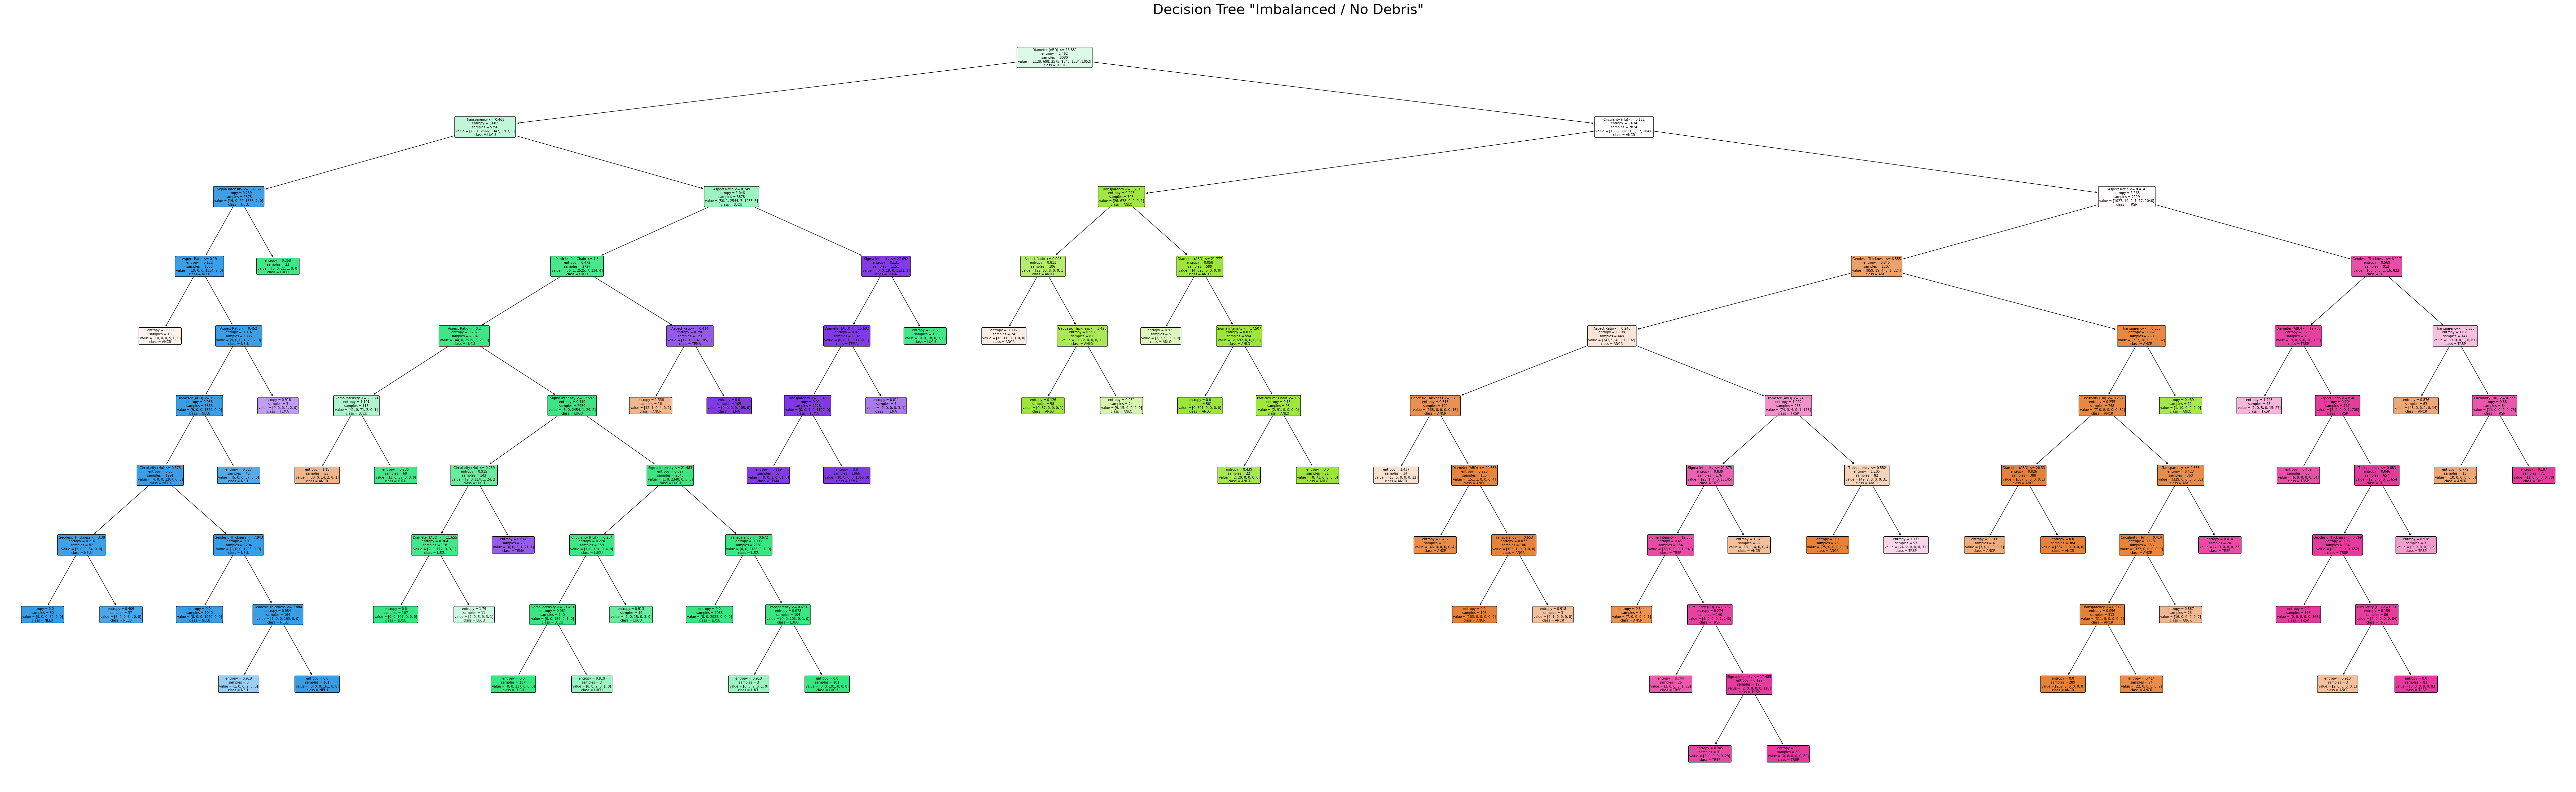

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,30)) 
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=class_names, rounded = True, fontsize=7)
plt.title('Decision Tree "Imbalanced / No Debris"', fontsize=30, pad=20)
plt.savefig('DecisionTree_IMbalanced_NO_DEBRIS.png',dpi=300)
plt.show()

#tree fit to training data

## Prediction on test set

In [28]:
# use model with test data
predictions = best_tree.predict(X_test)
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       484
           1       0.98      0.97      0.97       299
           2       0.99      0.99      0.99      1104
           3       0.98      0.99      0.99       575
           4       0.99      0.97      0.98       551
           5       0.95      0.94      0.94       451

    accuracy                           0.97      3464
   macro avg       0.96      0.96      0.96      3464
weighted avg       0.97      0.97      0.97      3464



In [29]:
predictions_decoded = label_encoder.inverse_transform(predictions)
predictions_decoded

array(['NELU', 'LUCU', 'LUCU', ..., 'ANCR', 'NELU', 'ANCR'], dtype=object)

In [30]:
unique_values, counts = np.unique(predictions_decoded, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

ANCR: 504
ANLO: 298
LUCU: 1097
NELU: 579
TEMA: 541
TRSP: 445


In [31]:
from sklearn.metrics import classification_report

# test difference between untuned and tuned tree for test data
print('Classification report for the original tree:')
print()
print(metrics.classification_report(y_test, tree.predict(X_test_orig)))
print('Classification report for the tuned tree:')
print()
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

with open('classification_report_IMbalanced_NO_DEBRIS.txt', 'w') as file:
    file.write(metrics.classification_report(y_test, best_tree.predict(X_test)))

Classification report for the original tree:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       484
           1       0.97      0.97      0.97       299
           2       1.00      0.99      0.99      1104
           3       0.98      0.99      0.99       575
           4       0.99      0.98      0.98       551
           5       0.94      0.94      0.94       451

    accuracy                           0.97      3464
   macro avg       0.97      0.97      0.97      3464
weighted avg       0.97      0.97      0.97      3464

Classification report for the tuned tree:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       484
           1       0.98      0.97      0.97       299
           2       0.99      0.99      0.99      1104
           3       0.98      0.99      0.99       575
           4       0.99      0.97      0.98       551
           5       0.95      0.94      0.94

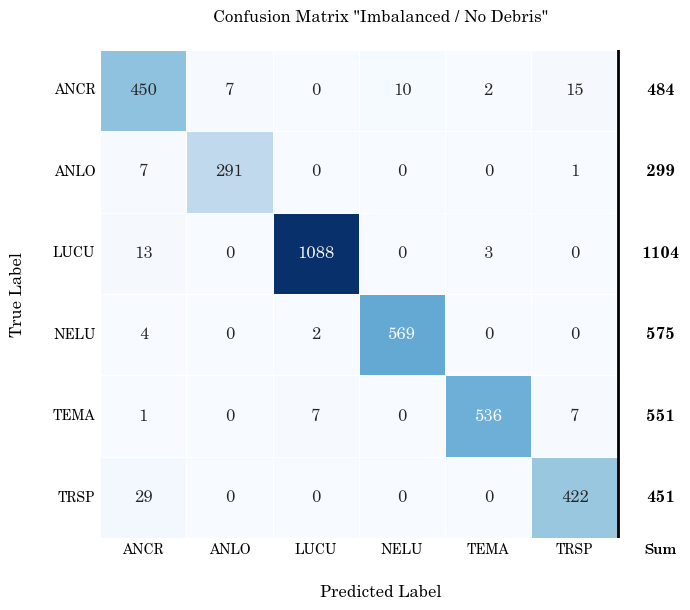

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

custom_font = "Century Schoolbook"  

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

row_sums = conf_matrix.sum(axis=1)

class_names = class_names.tolist() if isinstance(class_names, np.ndarray) else class_names
class_names_with_sum = class_names + ['Sum']

fig, ax = plt.subplots(figsize=(7, 6.2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"fontsize": 12, "fontfamily": custom_font}, ax=ax, linewidths=.5)

plt.title('Confusion Matrix "Imbalanced / No Debris"', fontsize=12, pad=20, fontfamily=custom_font)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12, fontfamily=custom_font)
plt.ylabel('True Label', labelpad=20, fontsize=12, fontfamily=custom_font)

plt.xticks(ticks=np.arange(len(class_names_with_sum)) + 0.5, labels=class_names_with_sum, fontsize=10, fontfamily=custom_font, rotation=0)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10, fontfamily=custom_font)

for i, sum_value in enumerate(row_sums):
    ax.text(len(class_names) + 0.5, i + 0.5, sum_value, ha='center', va='center', fontsize=12, fontfamily=custom_font, weight='bold', color='black')

plt.axvline(x=len(class_names), color='black', linewidth=2)

for tick in ax.get_xticklabels():
    if tick.get_text() == 'Sum':
        tick.set_weight('bold')

ax.tick_params(axis='y', which='both', length=0)  
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout() 

plt.savefig('confusion_matrix_imbalanced_NO_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()


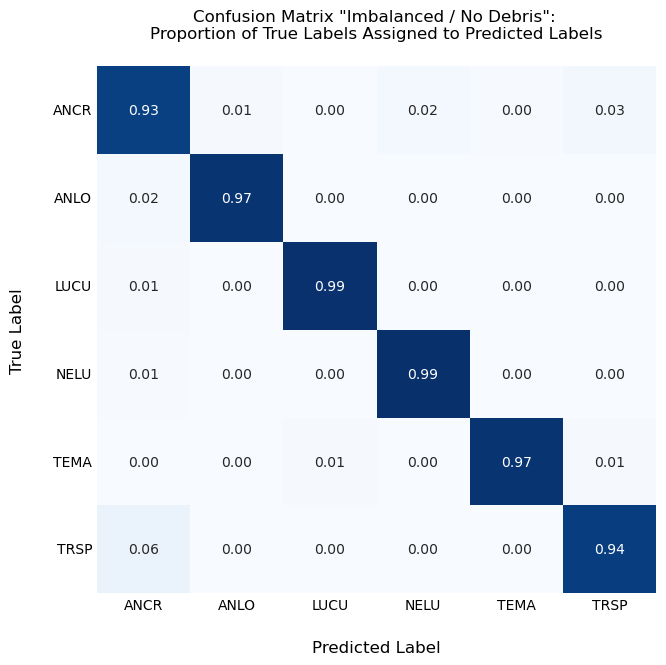

In [32]:
## Evaluation

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

conf_matrix_percent = conf_matrix.astype(float) / conf_matrix.sum(axis=1)[:, np.newaxis]# * 100

sns.set_context('talk')

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"fontsize": 10}, ax=ax)

plt.title('Confusion Matrix "Imbalanced / No Debris": \n'
    'Proportion of True Labels Assigned to Predicted Labels', fontsize=12, pad=20)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12)
plt.ylabel('True Label', labelpad=20, fontsize=12)

plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=10)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10)

ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

plt.savefig('confusion_matrix_proportions_imbalanced_no_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

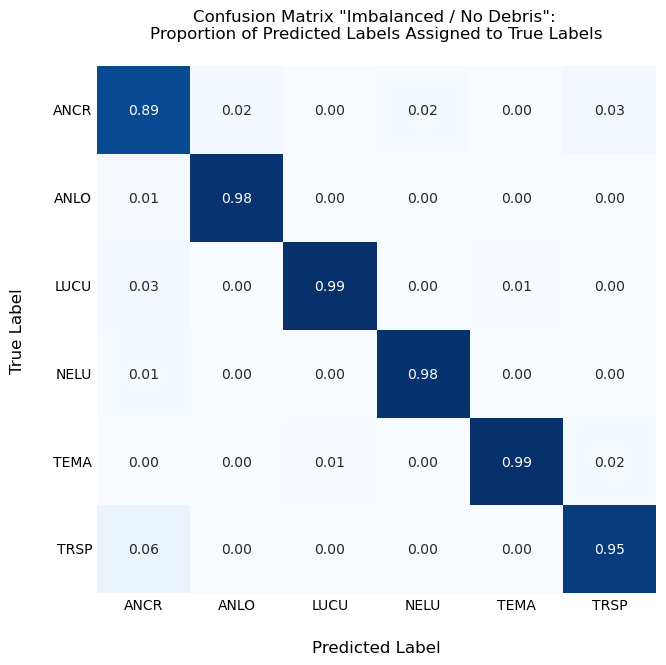

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_test, predictions)

conf_matrix_column_norm = conf_matrix.astype(float) / conf_matrix.sum(axis=0)

sns.set_context('talk')

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix_column_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"fontsize": 10}, ax=ax)

plt.title('Confusion Matrix "Imbalanced / No Debris": \n'
    'Proportion of Predicted Labels Assigned to True Labels', fontsize=12, pad=20)
plt.xlabel('Predicted Label', labelpad=20, fontsize=12)
plt.ylabel('True Label', labelpad=20, fontsize=12)

plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, fontsize=10)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0, fontsize=10)

ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
plt.tight_layout()

plt.savefig('confusion_matrix_column_normalized_imbalanced_no_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
predictions_decoded = label_encoder.inverse_transform(predictions)

data_results = data_all_reset.loc[X_test.index].copy() 

data_results = data_results.rename(columns={'Class': 'True Label'})
data_results = data_results[['path','Particle ID','True Label']]

data_results.loc[:, 'Predictions'] = predictions_decoded

In [34]:
pd.set_option('display.max_colwidth', None) 
data_results
data_results.to_csv('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/tree_IMbalanced_NO_DEBRIS_results.csv', index=False)

In [35]:
class_labels = ['ANCR', 'TEMA', 'NELU', 'LUCU', 'TRSP']

split_dfs = {}

In [36]:
import os
import shutil
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/tree_IMbalanced_NO_DEBRIS_results.csv'
data_results = pd.read_csv(file_path)

base_source_folder = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/Daten'

base_destination_folder = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/mismatched_IMbalanced_NO_DEBRIS'

if not os.path.exists(base_destination_folder):
    os.makedirs(base_destination_folder)

def generate_image_path(row):
    path = row['path'].replace('\\', '/') 
    particle_id = row['Particle ID'] - 1 

    images_folder = 'images'
    
    folder, filename = os.path.split(path)
    
    name, ext = os.path.splitext(filename)
    
    new_filename = f"{name}_{particle_id:05d}.png"
    
    new_path = os.path.join(folder, images_folder, new_filename)
    
    return new_path

def copy_image(row, destination_folder):
    src_image_path = generate_image_path(row)
    
    if not os.path.isfile(src_image_path):
        print(f"File not found: {src_image_path}")
        return
    
    true_label = row['True Label']
    pred_label = row['Predictions']
    
    if true_label == pred_label:
        return
    
    dest_folder_name = f"true_{true_label}_pred_{pred_label}"
    dest_folder = os.path.join(destination_folder, dest_folder_name)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    dest_image_path = os.path.join(dest_folder, os.path.basename(src_image_path))
    
    shutil.copy2(src_image_path, dest_image_path)
    
missing_files = 0
for index, row in data_results.iterrows():
    new_image_path = generate_image_path(row)
    
    try:
        copy_image(row, base_destination_folder)
    except Exception as e:
        print(f"Error processing row {index}: {e}")
        missing_files += 1

print(f"Total missing files: {missing_files}")

Total missing files: 0
